In [1]:
import pandas as pd
import os

import matplotlib.pyplot as plt

In [2]:
os.chdir('..')

# Cleaning usersha1-profile.csv

In [3]:
users = pd.read_csv('data/last.fm/usersha1-profile.csv',
                   header = None,
                   names = ['#id', 'gender', 'age', 'country', 'registered'])

FileNotFoundError: [Errno 2] File data/last.fm/usersha1-profile.csv does not exist: 'data/last.fm/usersha1-profile.csv'

In [ ]:
users.head()


users[users['#id'] == 'user_000001']

### Including: Age, Country

In [33]:
cleaned_users = users[['#id', 'age', 'country']].dropna().reset_index(drop=True)

print("There are {} users that have both their age and country.".format(cleaned_users_worldwide.shape[0]))

There are 284447 users that have both their age and country.


### Including: Age, Country (US)

In [25]:
cleaned_users = users[['#id', 'age', 'country']].dropna().reset_index(drop=True)

print("There are {} users that have both their age and country.".format(cleaned_users_worldwide.shape[0]))

There are 284447 users that have both their age and country.


In [36]:
cleaned_users_us = cleaned_users[cleaned_users['country'] == 'United States']

print('There are {} users that have both their age and country listed, and are also from the US'.format(cleaned_users_us.shape[0]))

There are 52286 users that have both their age and country listed, and are also from the US


### Only Age Matters

How many users will we have if we only mandate that a user has their age?

In [38]:
cleaned_users = users[['#id', 'age']].dropna().reset_index(drop=True)

print("There are {} users that have their age listed.".format(cleaned_users.shape[0]))

There are 284447 users that have their age listed.


# Lets say we just restrict to the US

In [39]:
df = cleaned_users_us.copy()

### What does age look like?

A majority of our users are under the age of 50. This might create problems with recommending to users outside of this age range.

In [45]:
# For some reason there are age values of -1337 that need to be cleaned
df = df[df['age'] > 0]

(array([1.6200e+02, 9.0730e+03, 3.0672e+04, 8.6050e+03, 2.3950e+03,
        8.4300e+02, 1.9200e+02, 3.6000e+01, 2.4000e+01, 5.0000e+01]),
 array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100]),
 <BarContainer object of 10 artists>)

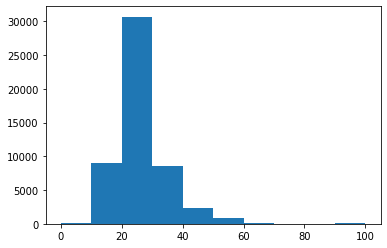

In [67]:
plt.hist(df.age, bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])

In [69]:
age_bins = ((df.age // 10) * 10).value_counts().reset_index().sort_values(by='index')
age_bins

,index,age
7,0.0,162
1,10.0,9073
0,20.0,30672
2,30.0,8605
3,40.0,2395
4,50.0,843
6,60.0,192
8,70.0,36
10,80.0,24
9,90.0,32


In [73]:
df.head()

,#id,age,country
2,00007a47085b9aab8af55f52ec8846ac479ac4fe,28.0,United States
8,0001a57568309b287363e72dc682e9a170ba6dc2,23.0,United States
10,00024b5b85c40f990c28644d53257819980bf6bb,23.0,United States
14,0002dd2154072434d26e5409faa591bfb260a01e,30.0,United States
15,00032c7933e0eb05f2258f1147ef81a90f2d4d6c,26.0,United States
